# **Credit approval**

**Входные данные:**

**Датасет**, в котором содержится информация о клиентах банка по 15 признакам. Они заменены на какие-то символы (как и сами признаки), с целью защиты конфиденциальности данных. а также информация о том, **был ли одобрен кредит**. Некоторые данные упущены.

### *Предварительная обработка данных*

Импортируем всё необходимое

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Загрузим **датасет**, с которым будем работать

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/27/data.csv')

Заполним пропуски **средними** значениями (для столбцов с числовыми значениями) и **наиболее популярными** (для столбцов с буквенными и символьными значениями)

In [7]:
#дозаполняем числовые
df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']] = df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']].fillna(df[['A2', 'A3', 'A8', 'A11', 'A14', 'A15']].mean())
#дозаполняем буквенные
columns = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']
for s in columns:
  df = df.fillna(df[s].value_counts().index[0])

In [4]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


Убедимся, что **нет дубликатов**

In [8]:
df.drop_duplicates()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


### *Разведочный анализ данных (EDA)*

Теперь мы можем работать с полным датасетом. Построим графики-зависимости по нескольким столбцам.

In [9]:
#рассмотрим распределение значений в столбце А1
first_column = df.groupby('A1').agg(COUNT=('A2', 'count')).reset_index()
#и в процентном соотношении
first_column['PERCENTAGE'] = first_column['COUNT'] / len(df)
first_column

,A1,COUNT,PERCENTAGE
0,a,210,0.304348
1,b,480,0.695652


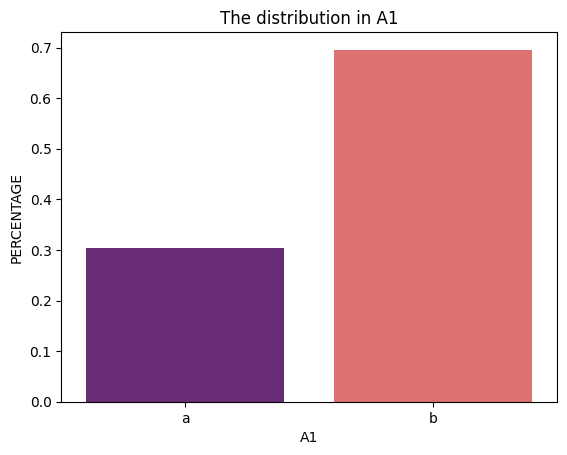

In [11]:
#рисуем график
figure_A1 = sns.barplot(x=first_column['A1'], y=first_column['PERCENTAGE'], palette='magma')
plt.title("The distribution in A1")
plt.show()

In [12]:
#рассмотрим распределение значений в столбце А6
sixth_column = df.groupby('A6').agg(COUNT=('A7', 'count')).reset_index()
sixth_column['PERCENTAGE'] = sixth_column['COUNT'] / len(df)
sixth_column

,A6,COUNT,PERCENTAGE
0,aa,54,0.078261
1,b,9,0.013043
2,c,137,0.198551
3,cc,41,0.059420
4,d,30,0.043478
5,e,25,0.036232
6,ff,53,0.076812
7,i,59,0.085507
8,j,10,0.014493
9,k,51,0.073913


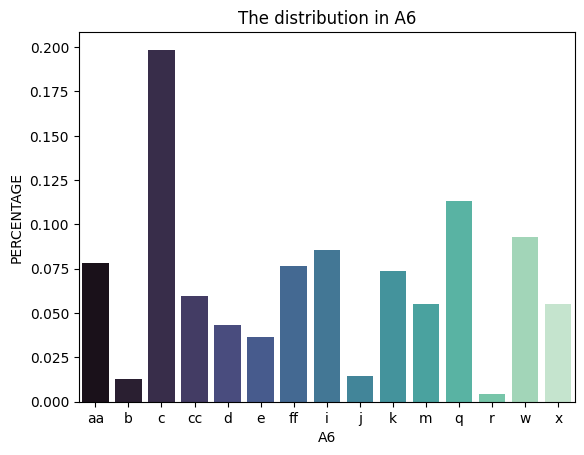

In [13]:
#рисуем график
figure_A6 = sns.barplot(x=sixth_column['A6'], y=sixth_column['PERCENTAGE'], palette='mako')
plt.title("The distribution in A6")
plt.show()

In [14]:
#рассмотрим распределение значений в столбце А8
eighth_column = df.groupby('A8').agg(COUNT=('A7', 'count')).reset_index()
eighth_column['PERCENTAGE'] = eighth_column['COUNT'] / len(df)
eighth_column

,A8,COUNT,PERCENTAGE
0,0.000,70,0.101449
1,0.040,33,0.047826
2,0.085,26,0.037681
3,0.125,30,0.043478
4,0.165,22,0.031884
...,...,...,...
127,16.000,1,0.001449
128,17.500,1,0.001449
129,18.000,1,0.001449
130,20.000,2,0.002899


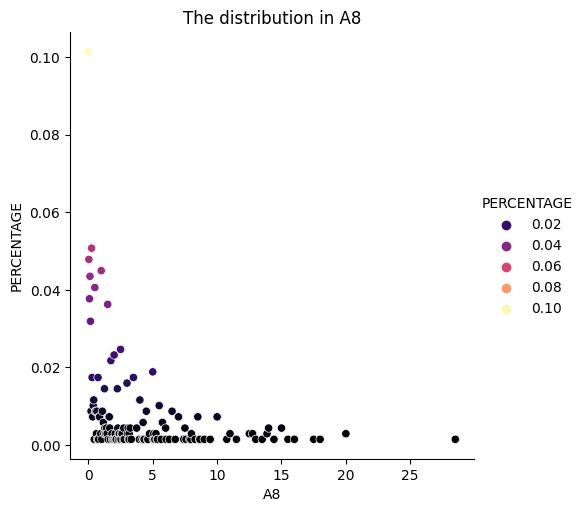

In [15]:
#рисуем график
figure_A8 = sns.relplot(x=eighth_column['A8'], y=eighth_column['PERCENTAGE'], palette='magma', kind='scatter', hue=eighth_column['PERCENTAGE'])
plt.title("The distribution in A8")
plt.show()

Проведём небольшой корреляционный анализ, который поможет нам понять, какие столбцы в датасете взаимосвязаны между собой и насколько сильная эта связь. Посчитаем коэффициент корреляции попарно между всеми столбцами с числовыми значениями. Возможны 3 варианта:


*   **Положительная корреляция:** Если одна переменная увеличивается, другая также увеличивается. Коэффициент корреляции находится в диапазоне от 0 до 1.
*   **Отрицательная корреляция:** Если одна переменная увеличивается, другая уменьшается. Коэффициент корреляции находится в диапазоне от 0 до -1.
*   **Нулевая корреляция:** Отсутствие линейной зависимости между переменными. Коэффициент корреляции близок к 0.

In [16]:
#список столбцов, на которые будем смотреть
list = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
for i in range (0, len(list)):
  for j in range (i + 1, len(list)):
    correlation = np.corrcoef(df[list[i]], df[list[j]])[0, 1]
    print("Коэффициент корреляции между {} и {}:".format(list[i], list[j]), correlation)

Коэффициент корреляции между A2 и A3: 0.2013158145528974
Коэффициент корреляции между A2 и A8: 0.3927872276643495
Коэффициент корреляции между A2 и A11: 0.18557492556929203
Коэффициент корреляции между A2 и A14: -0.07716059329977157
Коэффициент корреляции между A2 и A15: 0.018538807713639655
Коэффициент корреляции между A3 и A8: 0.2989015576657792
Коэффициент корреляции между A3 и A11: 0.27120673925842986
Коэффициент корреляции между A3 и A14: -0.22234646763999877
Коэффициент корреляции между A3 и A15: 0.12312115311068283
Коэффициент корреляции между A8 и A11: 0.3223296679061771
Коэффициент корреляции между A8 и A14: -0.07638893153219234
Коэффициент корреляции между A8 и A15: 0.051344929144616046
Коэффициент корреляции между A11 и A14: -0.1198085303086146
Коэффициент корреляции между A11 и A15: 0.06369243933021201
Коэффициент корреляции между A14 и A15: 0.06560933417678683


Можно наблюдать небольшую положительную корреляцию между столбцами A3 и A11, A3 и A8, A8 и A11, A2 и A8. Также можно заметить небольшую отрицательную корреляцию между столбцами A3 и A14.

Покажем на графике зависимость между A2 и A8:

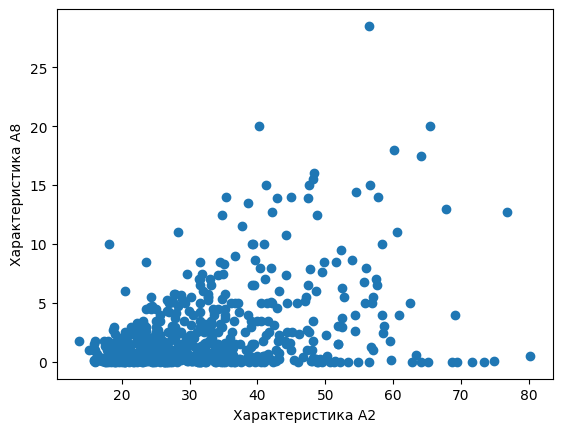

In [17]:
plt.scatter(df['A2'], df['A8'])
plt.xlabel('Характеристика A2')
plt.ylabel('Характеристика A8')
plt.show()

## *Применение моделей машинного обучения*

Импортируем всё, что понадобится

In [ ]:
!pip install graphviz
!pip install pydotplus

In [18]:
from sklearn import svm, tree, metrics  #Support Vector Machines - набор методов для классификации
from sklearn.model_selection import train_test_split  #функция для разделения датасета на train и test
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.svm import SVC  #метод опорных векторов
from sklearn.linear_model import LogisticRegression  #логистическая регрессия
from sklearn.tree import DecisionTreeClassifier  #дерево решений
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from IPython.display import Image
import pydotplus
import graphviz

Для удобства работы немного преобразуем датасет с помощью функции из библиотеки Pandas *get_dummies()*

Как сработает эта функция?

Допустим, имеется столбец, значения которого не являются числовыми и имеют конечный диапазон (N). Тогда вместо этого столбца будут созданы N новых, в которых значения уже будут 1 или 0, где 1 в n-ном столбце будет означать, что этой строке в исходном столбце соответствовало значение n

In [19]:
new_df = pd.get_dummies(df)

Распечатаем полученный датасет:

In [20]:
new_df

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_b,A4_l,...,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16_+,A16_-
0,30.83,0.000,1.25,1,202.0,0,0,1,0,0,...,1,0,1,1,0,1,0,0,1,0
1,58.67,4.460,3.04,6,43.0,560,1,0,0,0,...,1,0,1,1,0,1,0,0,1,0
2,24.50,0.500,1.50,0,280.0,824,1,0,0,0,...,1,1,0,1,0,1,0,0,1,0
3,27.83,1.540,3.75,5,100.0,3,0,1,0,0,...,1,0,1,0,1,1,0,0,1,0
4,20.17,5.625,1.71,0,120.0,0,0,1,0,0,...,1,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260.0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
686,22.67,0.750,2.00,2,200.0,394,1,0,0,0,...,0,0,1,0,1,1,0,0,0,1
687,25.25,13.500,2.00,1,200.0,1,1,0,0,0,...,0,0,1,0,1,1,0,0,0,1
688,17.92,0.205,0.04,0,280.0,750,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1


Разделим данные на *X* и *Y*, где *X* - набор признаков, а *Y* - ответ на вопрос "был ли одобрен кредит"

In [21]:
x = new_df.iloc[:,:-2].values
y = df['A16']  #в столбце А16 содершится решение по одобрентю или неодобрению кредита (+ или -)

Теперь разделим данные на обучающую и тестовую выборки с помощью функции *train_test_split*

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=19)

### *Дерево решений*

Работа с моделью "Дерево решений" - обучение и проверка на тестовой выборке

In [23]:
decision_tree_model = DecisionTreeClassifier()  #создаем модель
decision_tree_model.fit(x_train, y_train)  #обучаем

decision_tree_prediction = decision_tree_model.predict(x_test)  #предсказываем результат для тестовых данных

#оценим точность модели
print("Точность классификации: ", accuracy_score(decision_tree_prediction, y_test), sep='\n')   #насколько реpультаты нашей модели отличаются от исходных в датасете
print("-------------")
print("Матрица неточностей: ", confusion_matrix(decision_tree_prediction, y_test), sep='\n')   #сколько объектов было классифицировано правильно и неправильно в каждом классе
print("-------------")
print("Отчёт о классификации: ", classification_report(decision_tree_prediction, y_test), sep='\n')   #точности, полнота, F-мера для каждого класса и средние значения для каждого класса

Точность классификации: 
0.8034682080924855
-------------
Матрица неточностей: 
[[63 18]
 [16 76]]
-------------
Отчёт о классификации: 
              precision    recall  f1-score   support

           +       0.80      0.78      0.79        81
           -       0.81      0.83      0.82        92

    accuracy                           0.80       173
   macro avg       0.80      0.80      0.80       173
weighted avg       0.80      0.80      0.80       173



Более наглядное представление матрицы неточностей


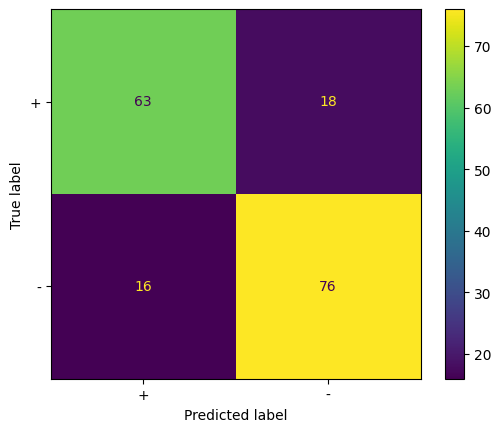

In [32]:
matrix = confusion_matrix(decision_tree_prediction, y_test)

ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=decision_tree_model.classes_).plot()
plt.show()

Создаём список колонок для визуализации дерева решений

In [25]:
names = new_df.columns
list_of_names = [names[i] for i in range (0, len(names) - 2)]

Собственно, визуализируем само дерево. Картинку ниже можно приблизить и изучить дерево решений подробнее

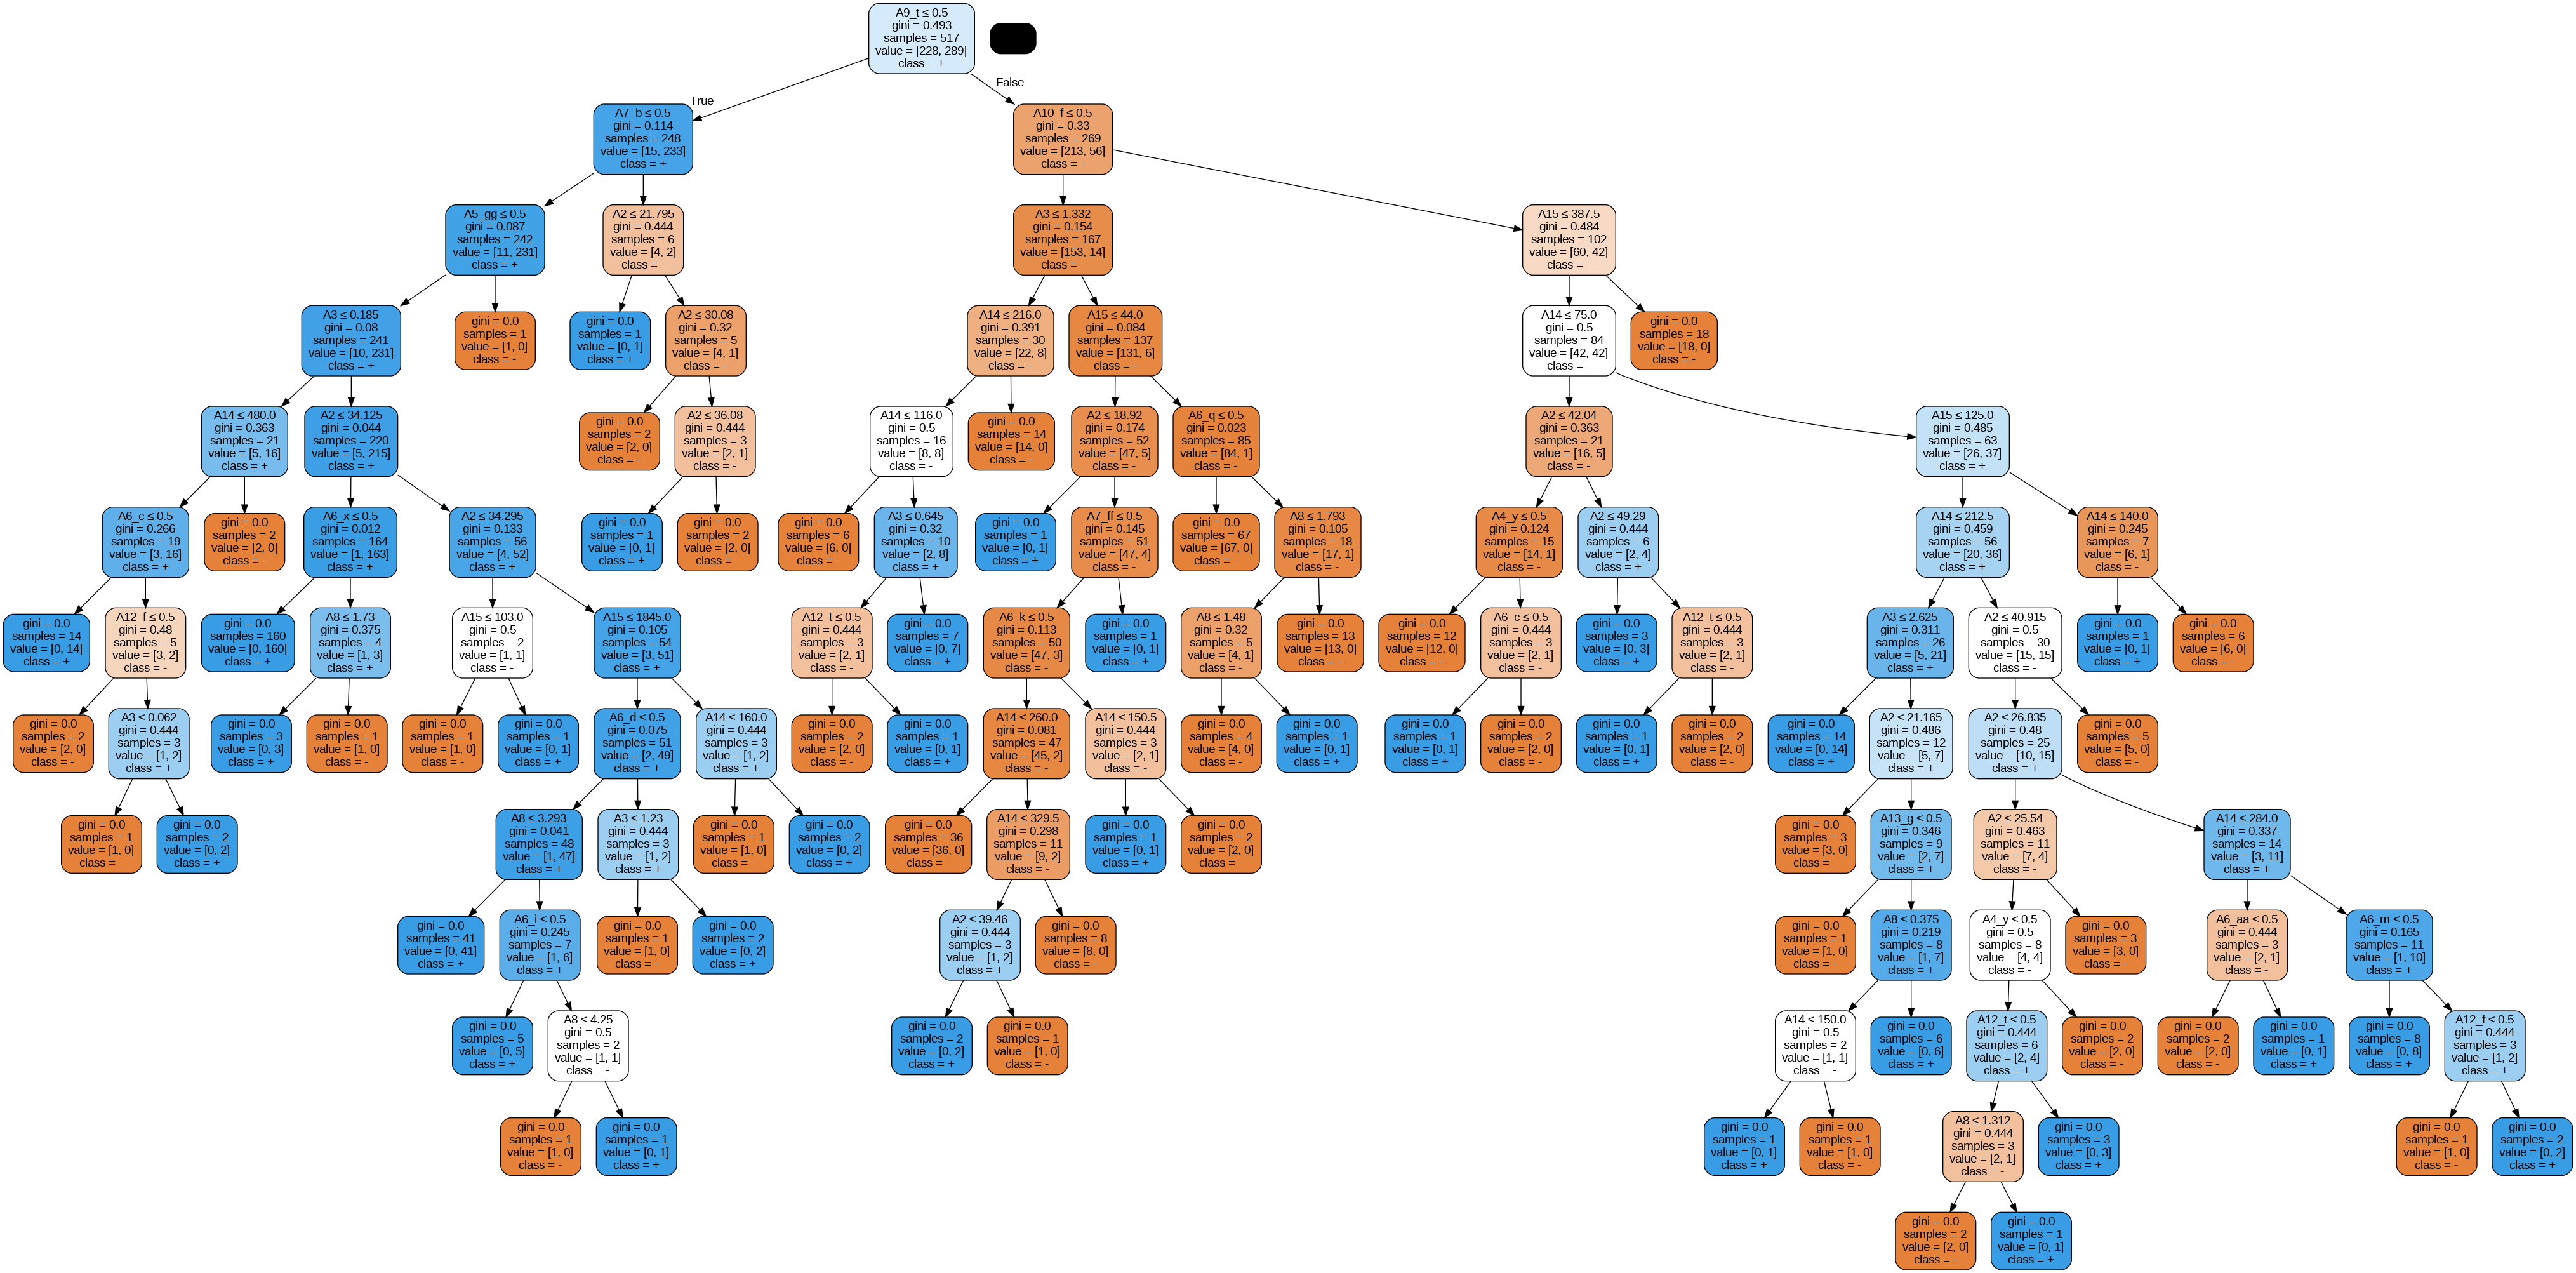

In [26]:
dot_data = tree.export_graphviz(decision_tree_model, out_file=None,
                      feature_names = list_of_names,
                      class_names = ['-', '+'],
                      filled=True, rounded=True,
                      special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('credit_approval_desicion_tree.png')
Image(graph.create_png())

### *Логистическая регрессия*

Далее работа с моделью "Логистическая регрессия" - обучение и проверка на тестовой выборке

In [27]:
#для предотвращения ошибки увеличим макс.кол-во итераций max_iter
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=3000)
logistic_regression.fit(x_train, y_train)

logistic_regression_prediction = logistic_regression.predict(x_test)

print("Точность классификации: ", accuracy_score(logistic_regression_prediction, y_test), sep='\n')
print("-------------")
print("Матрица неточностей: ", confusion_matrix(logistic_regression_prediction, y_test), sep='\n')
print("-------------")
print("Отчёт о классификации: ", classification_report(logistic_regression_prediction, y_test), sep='\n')

Точность классификации: 
0.8497109826589595
-------------
Матрица неточностей: 
[[70 17]
 [ 9 77]]
-------------
Отчёт о классификации: 
              precision    recall  f1-score   support

           +       0.89      0.80      0.84        87
           -       0.82      0.90      0.86        86

    accuracy                           0.85       173
   macro avg       0.85      0.85      0.85       173
weighted avg       0.85      0.85      0.85       173



Более наглядное представление матрицы неточностей

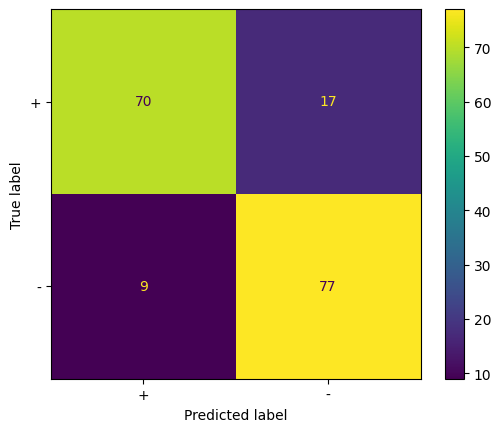

In [29]:
matrix = confusion_matrix(logistic_regression_prediction, y_test)

ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=logistic_regression.classes_).plot()
plt.show()

### *Метод опорных векторов*

Далее работа с моделью "Метод опорных векторов" - обучение и проверка на тестовой выборке

In [33]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

svc_prediction = svc_model.predict(x_test)

print("Точность классификации: ", accuracy_score(svc_prediction, y_test), sep='\n')
print("-------------")
print("Матрица неточностей: ", confusion_matrix(svc_prediction, y_test), sep='\n')
print("-------------")
print("Отчёт о классификации: ", classification_report(svc_prediction, y_test), sep='\n')

Точность классификации: 
0.7167630057803468
-------------
Матрица неточностей: 
[[37  7]
 [42 87]]
-------------
Отчёт о классификации: 
              precision    recall  f1-score   support

           +       0.47      0.84      0.60        44
           -       0.93      0.67      0.78       129

    accuracy                           0.72       173
   macro avg       0.70      0.76      0.69       173
weighted avg       0.81      0.72      0.73       173



Более наглядное представление матрицы неточностей

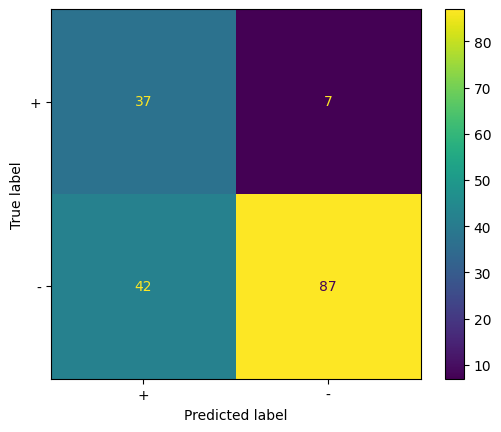

In [34]:
matrix = confusion_matrix(svc_prediction, y_test)

ConfusionMatrixDisplay(confusion_matrix=matrix,
                              display_labels=svc_model.classes_).plot()
plt.show()